In [19]:
import yaml
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import custom_plotting as cp

import pickle

In [28]:
with open('./dataset/oversampled_dataset', 'rb') as handle:
    oversampled_dataset = pickle.load(handle)

In [29]:
# 30% examples in test data
train = oversampled_dataset['train']
test = oversampled_dataset['test']
train_labels = oversampled_dataset['train_labels']
test_labels = oversampled_dataset['test_labels']
features = oversampled_dataset['features']

In [30]:


# Create the model
model = RandomForestClassifier(n_estimators=250, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [31]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print('Average number of nodes'+ str(np.mean(n_nodes)))
print('Average maximum depth '+str(np.mean(max_depths)))


Average number of nodes1810.52
Average maximum depth 27.896


In [32]:
# Training set predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing set predictions
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

RecallBaseline: 1.0 Test: 0.18 Train: 1.0
PrecisionBaseline: 0.04 Test: 0.41 Train: 1.0
RocBaseline: 0.5 Test: 0.81 Train: 1.0


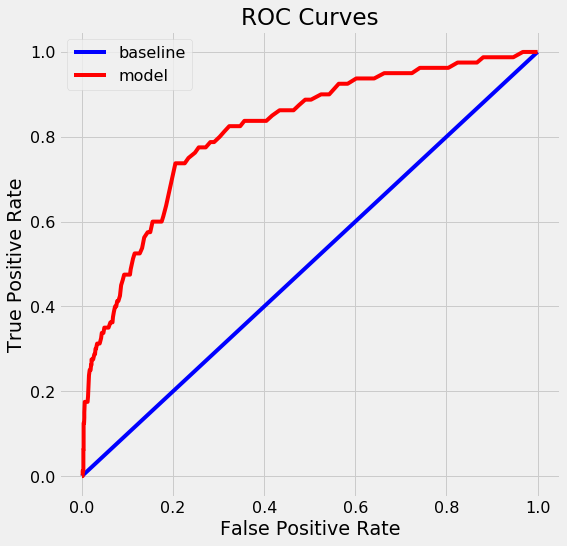

In [33]:
cp.evaluate_model(test_labels, rf_predictions, rf_probs, train_labels, train_rf_predictions, train_rf_probs)


[[1935   20]
 [  66   14]]


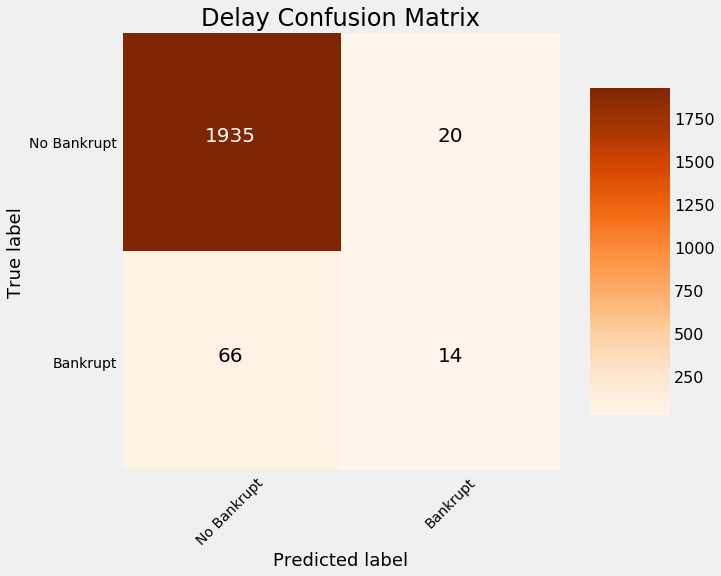

In [34]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
cp.plot_confusion_matrix(cm, classes = ['No Bankrupt', 'Bankrupt'],
                      title = 'Delay Confusion Matrix')


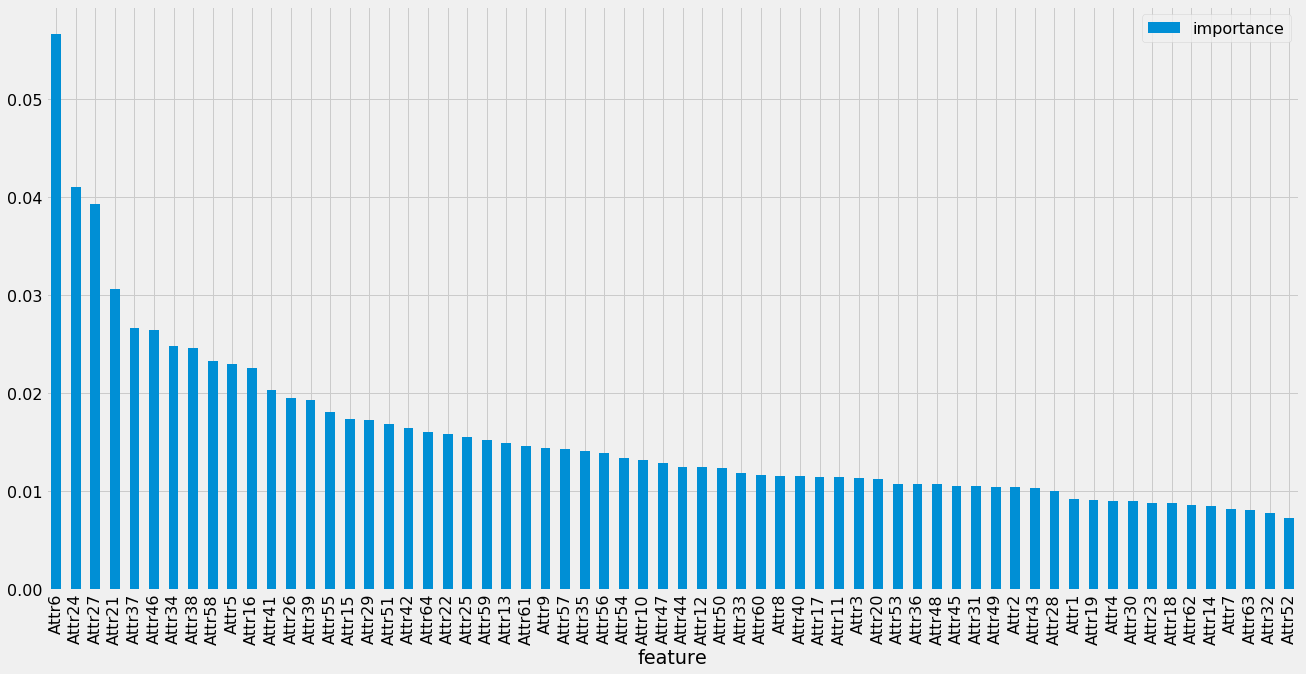

In [35]:
# Extract feature importances
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi.plot.bar(x='feature', figsize=(20,10))


In [18]:
list(fi.head(15).reset_index()['feature'])

['Attr6',
 'Attr24',
 'Attr27',
 'Attr21',
 'Attr37',
 'Attr46',
 'Attr34',
 'Attr38',
 'Attr58',
 'Attr5',
 'Attr16',
 'Attr41',
 'Attr26',
 'Attr39',
 'Attr55']